In [11]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set()

In [12]:
df = pd.read_csv("./Country-data.csv")

In [13]:
label = LabelEncoder()
df['country'] = label.fit_transform(df['country'])

In [14]:
X = df[['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

for colm in X:
    df[colm] = scaler.fit_transform(df[colm].values.reshape(-1,1))

In [16]:
inertia = []
k_range = range(1, 11)

In [ ]:
for k in k_range:
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels_kmeans = kmeans.labels_

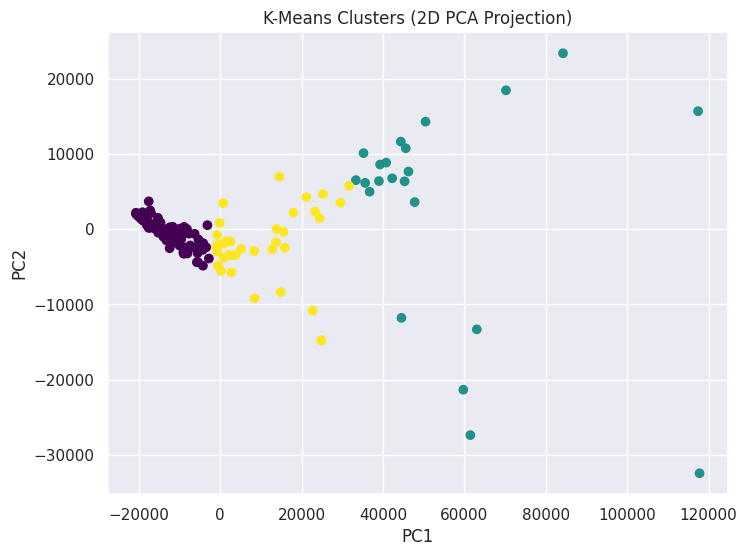

In [43]:
pca_kmeans = PCA(n_components=2)
X_2d_kmeans = pca_kmeans.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d_kmeans[:, 0], X_2d_kmeans[:, 1], c=labels_kmeans, cmap='viridis')
plt.title("K-Means Clusters (2D PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [18]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

labels_dbscan = dbscan.labels_

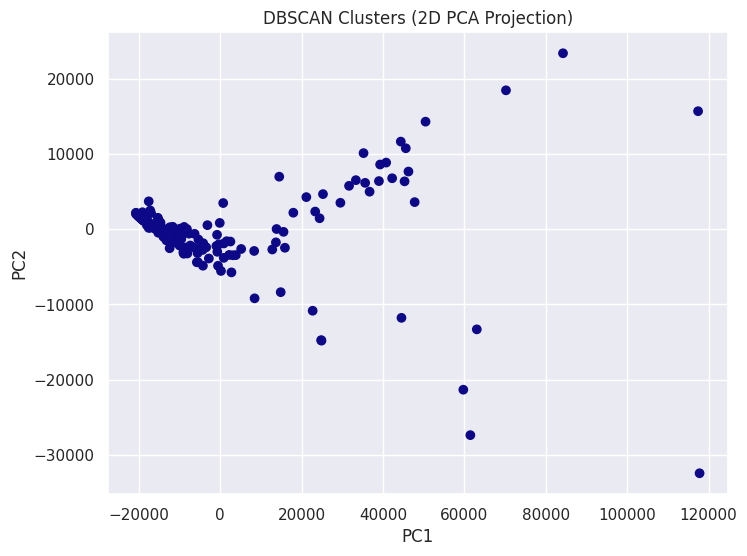

In [45]:
pca_dbscan = PCA(n_components=2)
X_2d_dbscan = pca_dbscan.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d_dbscan[:, 0], X_2d_dbscan[:, 1], c=labels_dbscan, cmap='plasma')
plt.title("DBSCAN Clusters (2D PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.94791994 0.05207329]


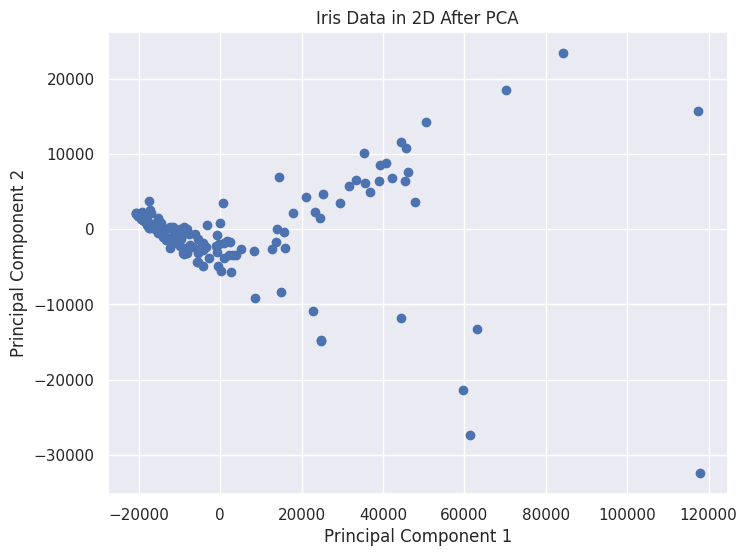

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("Iris Data in 2D After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


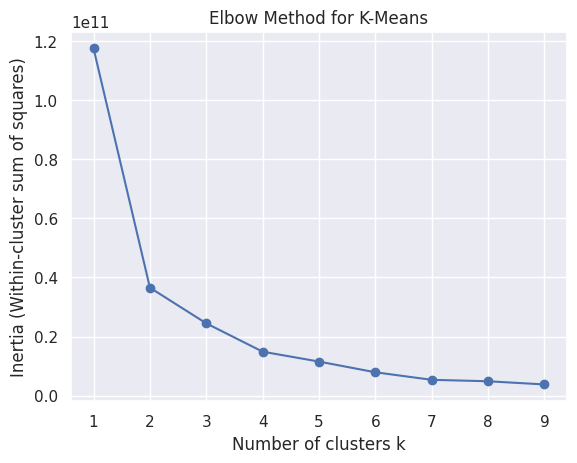

In [48]:

inertias = []
K_range = range(1, 10)  # Example: testing k = 1 to 9

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X)
    inertias.append(kmeans_temp.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method for K-Means")
plt.show()

In [53]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

silhouette_kmeans = silhouette_score(X, labels_kmeans)
print("Silhouette Score (K-Means):", silhouette_kmeans)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels_dbscan = dbscan.labels_
if len(set(labels_dbscan) - {-1}) > 1:  # Exclude noise (-1)
    silhouette_dbscan = silhouette_score(X, labels_dbscan)
    print("Silhouette Score (DBSCAN):", silhouette_dbscan)
else:
    print("DBSCAN did not produce enough clusters to compute a silhouette score.")


Silhouette Score (K-Means): 0.6004224256794997
DBSCAN did not produce enough clusters to compute a silhouette score.


In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)



Explained variance ratio: [0.94791994 0.05207329]


In [51]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [52]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.94791994 0.05207329]
